In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Read Data set Hoda and Split data to train, validation and test

In [3]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset

In [4]:
print('Reading train dataset (Train 60000.cdb)...')
X_train_full, y_train_full = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                     images_height=32,
                                     images_width=32,
                                     one_hot=False,
                                     reshape=True)

Reading train dataset (Train 60000.cdb)...


In [5]:
print('Reading test dataset (Test 20000.cdb)...')
X_test, y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

Reading test dataset (Test 20000.cdb)...


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid=train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=42)

# Sequential Model with two hidden layers

In [7]:
import tensorflow as tf
from tensorflow import keras

#### Two Hidden Layer, 300-100 neurons

In [8]:
model=keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[32,32]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3756 - accuracy: 0.9024 - val_loss: 0.1818 - val_accuracy: 0.9499
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1510 - accuracy: 0.9586 - val_loss: 0.1458 - val_accuracy: 0.9612
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1199 - accuracy: 0.9683 - val_loss: 0.1269 - val_accuracy: 0.9643
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1019 - accuracy: 0.9730 - val_loss: 0.1103 - val_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0883 - accuracy: 0.9763 - val_loss: 0.1034 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0779 - accuracy: 0.9795 - val_loss: 0.0964 - val_accuracy: 0.9738
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0696 - accuracy: 0.9818 - val_loss: 0.0888 - val_accuracy:

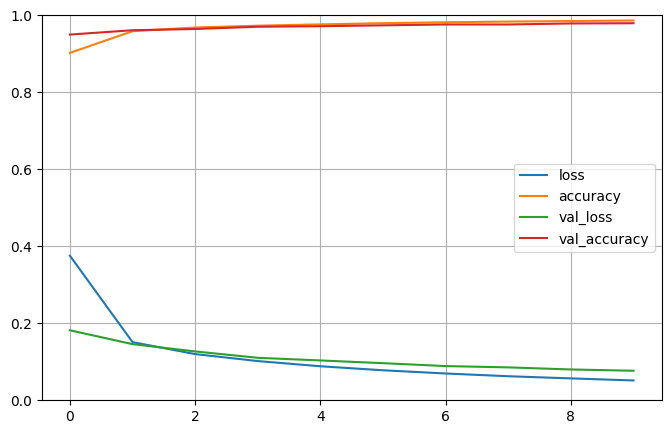

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.1407 - accuracy: 0.9589


[0.14066357910633087, 0.9589499831199646]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 79ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.74, 0.02, 0.  , 0.  , 0.  , 0.17, 0.02, 0.05, 0.  , 0.  ]],
      dtype=float32)

#### Three hidden Layers, 300-200-100 neurons

In [22]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3691 - accuracy: 0.9041 - val_loss: 0.1656 - val_accuracy: 0.9543
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1373 - accuracy: 0.9619 - val_loss: 0.1274 - val_accuracy: 0.9652
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1063 - accuracy: 0.9704 - val_loss: 0.1102 - val_accuracy: 0.9698
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0877 - accuracy: 0.9762 - val_loss: 0.0960 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0739 - accuracy: 0.9798 - val_loss: 0.0905 - val_accuracy: 0.9754
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0638 - accuracy: 0.9826 - val_loss: 0.0844 - val_accuracy: 0.9772
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0555 - accuracy: 0.9856 - val_loss: 0.0769 - val_accuracy:

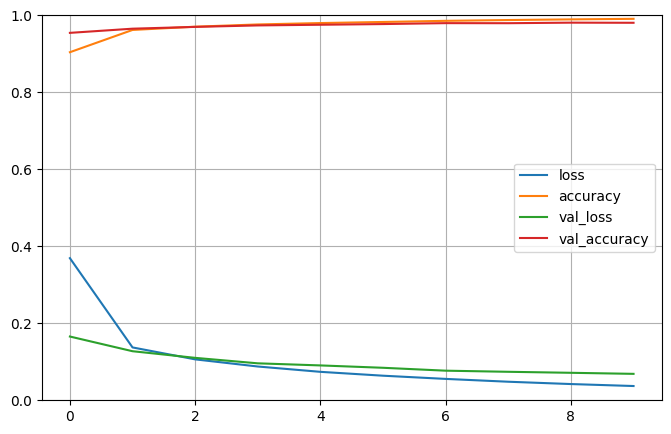

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 131ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.03, 0.  , 0.  , 0.  , 0.39, 0.01, 0.01, 0.01, 0.  ]],
      dtype=float32)

# Functional API Model

#### Architecture: Two hidden Layers(each 30 neurons) parallel Without hidden Layer

In [79]:
input_ = keras.layers.Input(shape=[1024])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(10, activation="softmax")(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           30750       ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 1054)         0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

##### loss=mse, Optimizer=SGD

In [27]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) #batch_size default = 32

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 27.6420 - accuracy: 0.1194 - val_loss: 27.4976 - val_accuracy: 0.1140
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 27.6416 - accuracy: 0.1189 - val_loss: 27.4973 - val_accuracy: 0.1125
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 27.6414 - accuracy: 0.1194 - val_loss: 27.4970 - val_accuracy: 0.1123
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 27.6412 - accuracy: 0.1189 - val_loss: 27.4968 - val_accuracy: 0.1124
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 27.6410 - accuracy: 0.1194 - val_loss: 27.4967 - val_accuracy: 0.1125
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 27.6409 - accuracy: 0.1197 - val_loss: 27.4966 - val_accuracy: 0.1130
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 27.6407 - accuracy: 0.1189 - val_loss: 27.4965 -

##### loss=sparse_categorical_crossentropy, optimizer=adam --- Best Model

In [80]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1897 - accuracy: 0.9476 - val_loss: 0.1110 - val_accuracy: 0.9679
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0785 - accuracy: 0.9781 - val_loss: 0.0899 - val_accuracy: 0.9748
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0562 - accuracy: 0.9835 - val_loss: 0.0782 - val_accuracy: 0.9791
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0776 - val_accuracy: 0.9794
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.0809 - val_accuracy: 0.9802
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0248 - accuracy: 0.9915 - val_loss: 0.0752 - val_accuracy: 0.9808
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0804 - val_accuracy:

##### loss=sparse_categorical_crossentropy, optimizer=adam, batch_size=Full Data

In [33]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=48000)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.3839 - accuracy: 0.1274 - val_loss: 2.2333 - val_accuracy: 0.1904
Epoch 2/10
1/1 [==============================] - 0s 387ms/step - loss: 2.2324 - accuracy: 0.1883 - val_loss: 2.0938 - val_accuracy: 0.2725
Epoch 3/10
1/1 [==============================] - 0s 362ms/step - loss: 2.0925 - accuracy: 0.2749 - val_loss: 1.9641 - val_accuracy: 0.3638
Epoch 4/10
1/1 [==============================] - 0s 400ms/step - loss: 1.9623 - accuracy: 0.3684 - val_loss: 1.8427 - val_accuracy: 0.4476
Epoch 5/10
1/1 [==============================] - 0s 373ms/step - loss: 1.8405 - accuracy: 0.4493 - val_loss: 1.7289 - val_accuracy: 0.5120
Epoch 6/10
1/1 [==============================] - 0s 393ms/step - loss: 1.7264 - accuracy: 0.5151 - val_loss: 1.6220 - val_accuracy: 0.5677
Epoch 7/10
1/1 [==============================] - 0s 366ms/step - loss: 1.6191 - accuracy: 0.5700 - val_loss: 1.5216 - val_accuracy: 0.6183
Epoch 8/10
1/1 [=======

In [30]:
model.evaluate(X_test,y_test) #[Test Loss, TestAccuracy]

625/625 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9668


[0.16155698895454407, 0.9667999744415283]

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 54ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.01, 0.  , 0.  , 0.  , 0.96, 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

#### Architecture: Three hidden Layers(each 100 neurons) parallel Without Two hidden Layers(each 50 neurons) 

In [34]:
input_ = keras.layers.Input(shape=[1024])
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(input_)
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([hidden2, hidden4])
output = keras.layers.Dense(10, activation="softmax")(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1336 - accuracy: 0.9611 - val_loss: 0.0674 - val_accuracy: 0.9796
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0762 - val_accuracy: 0.9760
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0530 - val_accuracy: 0.9846
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0563 - val_accuracy: 0.9852
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0517 - val_accuracy: 0.9872
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0668 - val_accuracy: 0.9837
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0820 - val_accuracy:

In [36]:
model.evaluate(X_test,y_test) #[Test Loss, TestAccuracy]

625/625 [==============================] - 2s 2ms/step - loss: 0.1400 - accuracy: 0.9749


[0.1400316208600998, 0.9749000072479248]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 29ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.45, 0.  , 0.  , 0.  , 0.  , 0.55, 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

# Predict My HandWriting

In [163]:
import glob

In [164]:
myhandwriting=glob.glob('./MyHandWriting/*')

In [165]:
def prepare_image(image: np.ndarray):
    #resize
    resized_image=cv.resize(image, (32,32), interpolation=cv.INTER_AREA)
    #BGR TO Gray
    gray_image=cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
    return gray_image

In [166]:
data=[]
for file_path in myhandwriting:
    # Read Image
    img=cv.imread(file_path)
    #Change Dimension from 2 to 1
    row=prepare_image(img)#.reshape(-1)
    data.append(row/255)

In [167]:
X=np.asarray(data)

In [169]:
X= X.reshape(X.shape[0], X.shape[1],X.shape[2], 1)

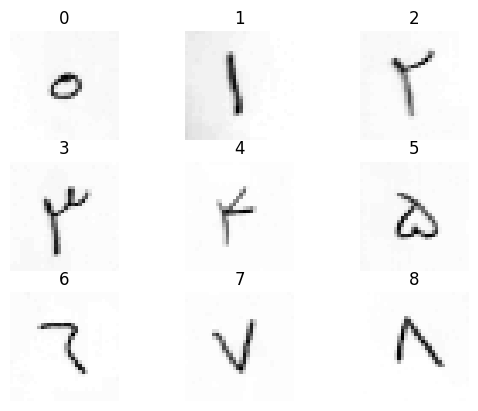

In [170]:
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(X[i].squeeze(),cmap='gray' )
    plt.axis('off')
    plt.title(i)

In [171]:
y= X.reshape(X.shape[0],-1)

In [173]:
y_proba = model.predict(y)
y_proba.round(2)

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)